## Experiment
Introduce point cluster type, ring type, crescent type, bisection type, Gaussian type data respectively

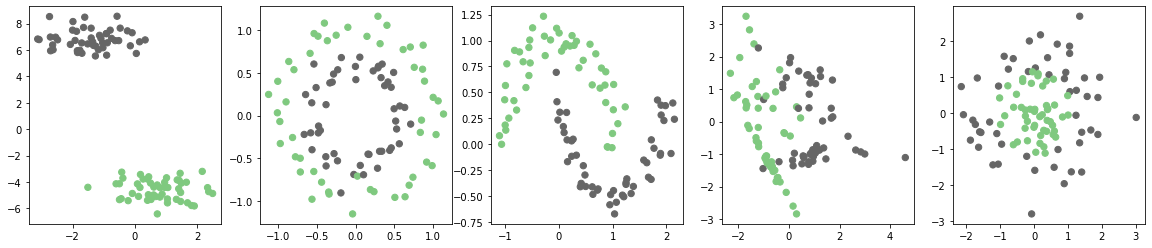

In [1]:

from sklearn.datasets import make_blobs,make_circles,make_moons,make_classification,make_gaussian_quantiles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

samples = 100

datasets = [make_blobs(n_samples=samples,centers=2,cluster_std=0.8,random_state=100),
           make_circles(n_samples=samples,noise=0.1,factor=0.6,random_state=200),
           make_moons(n_samples=samples,noise=0.1,random_state=300),
           make_classification(n_samples=samples,n_features=2,n_informative=2,n_redundant=0,random_state=400),
           make_gaussian_quantiles(n_samples=samples,n_classes=2,random_state=500)]

fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,4))

for i,(X,y) in enumerate(datasets):
    ax[i].scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent,s=40)
plt.show()



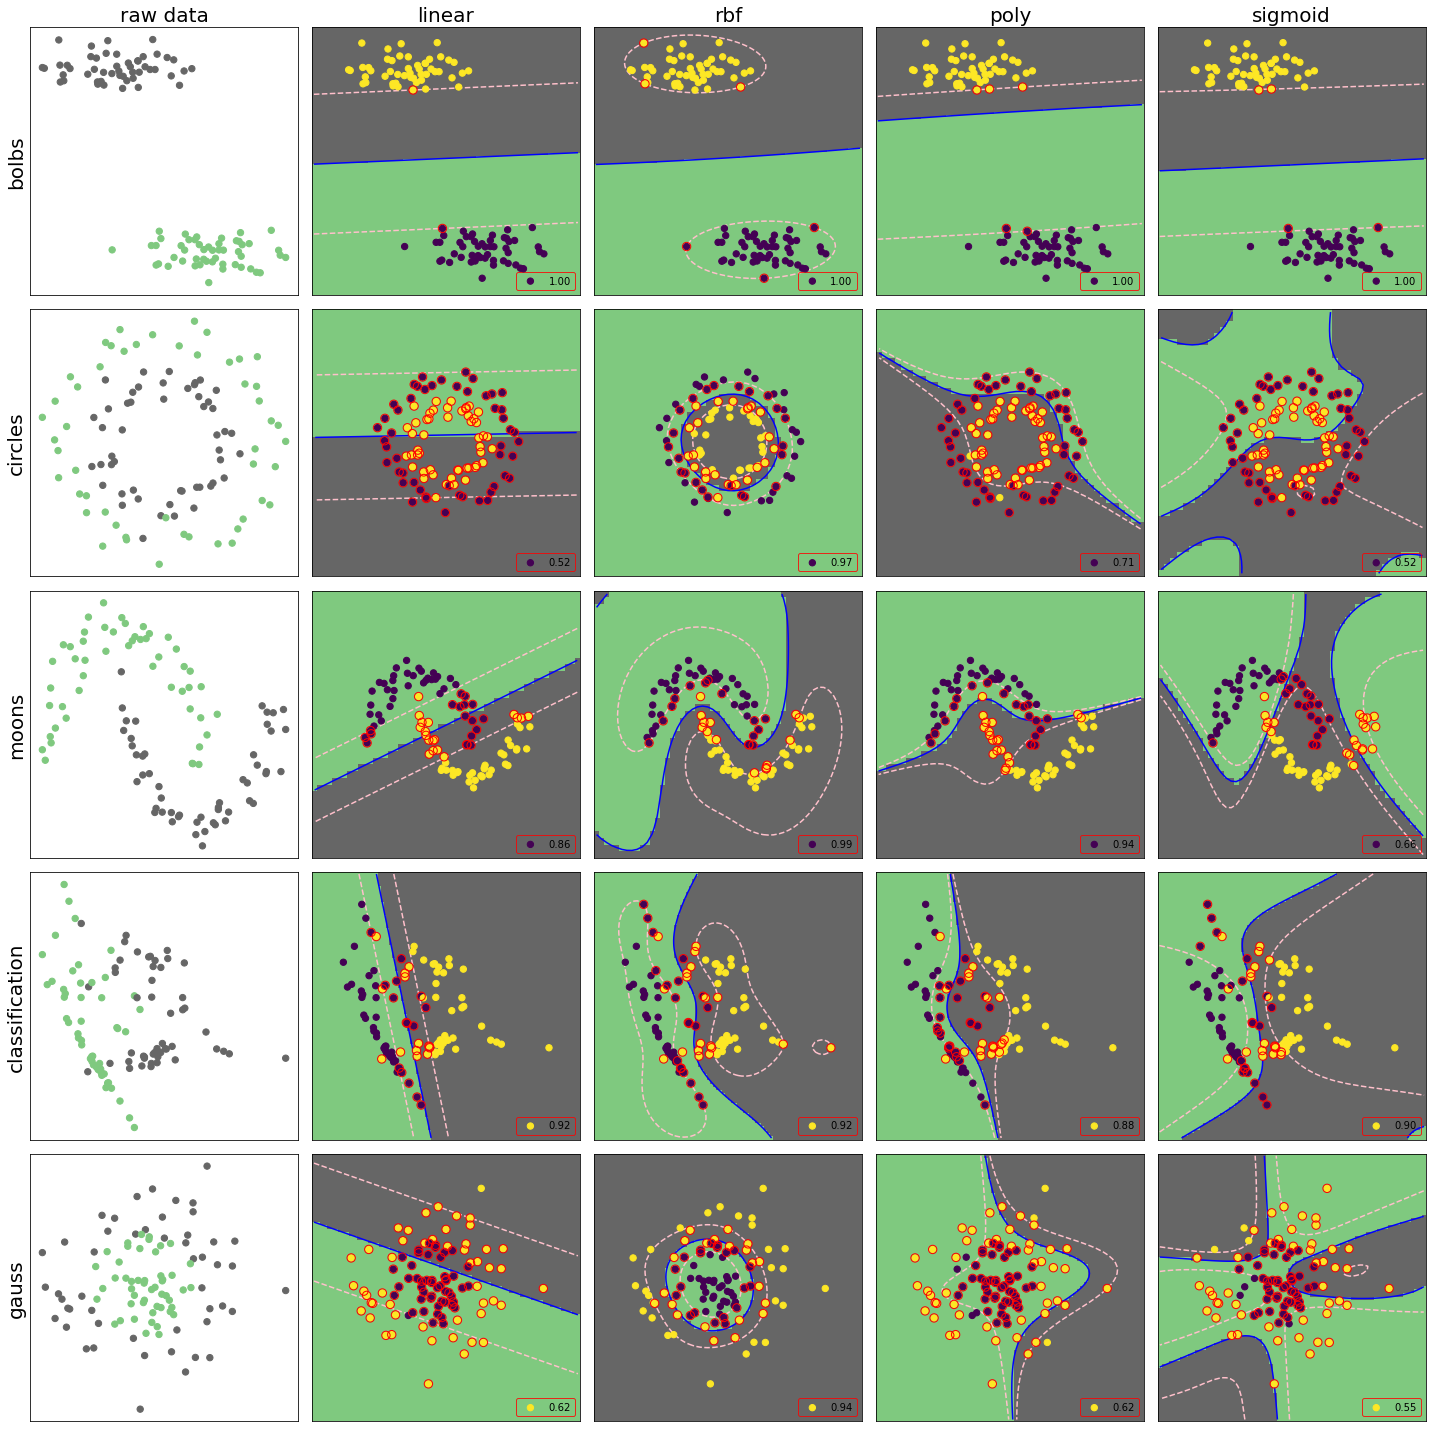

In [2]:
kernel = ['linear','rbf','poly','sigmoid']
data_name = ['bolbs','circles','moons','classification','gauss']
fig,ax = plt.subplots(nrows=5,ncols=5,figsize=(20,20))
for i,(X,y) in enumerate(datasets):
    if i==0:
        ax[i,0].set_title("raw data",fontsize=20)
    ax[i,0].scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent,s=40)
    ax[i,0].set_xticks(())
    ax[i,0].set_yticks(())
    ax[i,0].set_ylabel(data_name[i],fontsize=20)
    for j,core in enumerate(kernel,1):
        if i==0:
            ax[0,j].set_title(core,fontsize=20)
        # Create a grid and calculate distances
        xx,yy = ((min(X[:,0]-1),max(X[:,0]+1)),(min(X[:,1]-1),max(X[:,1]+1)))
        xx = np.arange(xx[0],xx[1],step=0.1)
        yy = np.arange(yy[0],yy[1],step=0.1)
        XX,YY = np.meshgrid(xx,yy)
        grid = np.c_[XX.ravel(),YY.ravel()]
        
        model = SVC(kernel=core,degree=3,C=1.0)
        model.fit(X,y)
        score = model.score(X,y)
        distance = model.decision_function(grid).reshape(XX.shape)
#         print(distance.shape)
        
        ax[i,j].scatter(X[:,0],X[:,1],c=y,s=40,zorder=10,label="%.2f" % score)
        # draw svm
        ax[i,j].scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],edgecolor="red",s=70,facecolor="none",zorder=10)
        
        ax[i,j].pcolormesh(XX,YY,distance>0,cmap=plt.cm.Accent,shading="auto")
        ax[i,j].contour(XX,YY,distance,levels=[-1,0,1],colors=["pink","blue","pink"],\
                         linestyles=['dashed','solid','dashed'])
        ax[i,j].legend(loc="lower right",edgecolor="red",facecolor="none")
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
fig.tight_layout()
plt.savefig('./svm.png')
plt.show()



## Iris
Here we use the Iris case as the actual analysis case, and SVM is used for multi-classification.

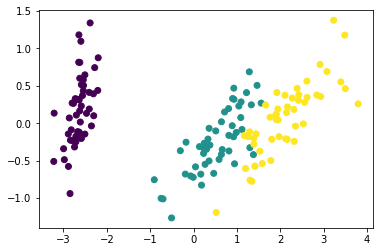

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

data = load_iris()
panda = pd.DataFrame(data.data,columns=['sepal length ',
 'sepal width ',
 'petal length ',
 'petal width '])

X = PCA(2).fit_transform(data.data)
y = data.target
plt.scatter(X[:,0],X[:,1],c=y)


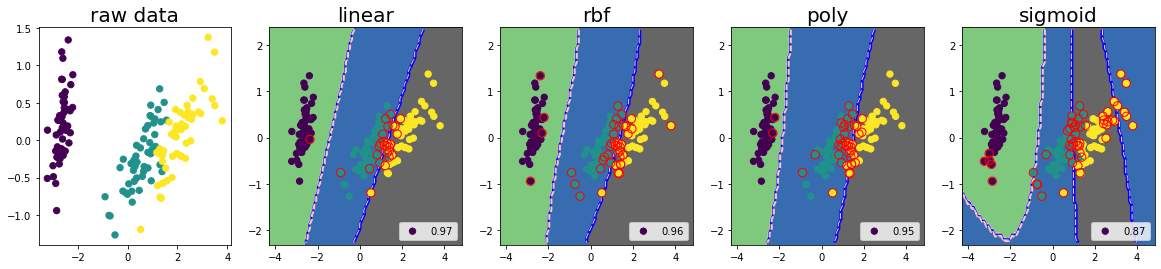

In [4]:
kernel = ['linear','rbf','poly','sigmoid']
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,4))
for i,core in enumerate(kernel,1):

    xx,yy = ((min(X[:,0]-1),max(X[:,0]+1)),(min(X[:,1]-1),max(X[:,1]+1)))
    xx = np.arange(xx[0],xx[1],step=0.1)
    yy = np.arange(yy[0],yy[1],step=0.1)
    XX,YY = np.meshgrid(xx,yy)
    grid = np.c_[XX.ravel(),YY.ravel()]

    #  predict classification
    model = SVC(kernel=core,gamma="scale",decision_function_shape="ovo",degree=3,C=1.0)
#     model = SVC(kernel=core,gamma="scale",decision_function_shape="ovr",degree=3,C=1.0)
    model.fit(X,y)
    score=model.score(X,y)
    prediction = model.predict(grid).reshape(XX.shape)
    if i-1==0:
        ax[0].set_title("raw data",fontsize=20)
        ax[0].scatter(X[:,0],X[:,1],c=y,s=40)
    ax[i].set_title(core,fontsize=20)
    ax[i].scatter(X[:,0],X[:,1],c=y,label="%.2f"% score,s=40,zorder=10)
    ax[i].scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,edgecolor="red",facecolor="none",zorder=10)
    ax[i].pcolormesh(XX,YY,prediction,cmap=plt.cm.Accent,shading="auto")
    ax[i].contour(XX,YY,prediction,colors=["pink","blue","pink"],linestyles=['dashed','solid','dashed'])
    ax[i].legend(loc=4)
